In [1]:
from Solve_new import psi_new
import numpy as np
n = 200000
wavefunction, x, t, A = psi_new([-200, 4096, -400, n], n_of_exp=1)

Time Propagation: 100%|██████████| 200000/200000 [02:34<00:00, 1295.23it/s]


(5000,)


Wavelet Transform: 100%|██████████| 238/238 [13:06<00:00,  3.31s/it]


In [2]:
import os
import numpy as np

# Specify the folder path
folder_path = './results'

# List to store loaded arrays
numpy_arrays = []

# Loop through files in the directory
for file in os.listdir(folder_path):
    if file.startswith('A') and file.endswith('.npy'):  # Check if file starts with 'A' and ends with '.npy'
        file_path = os.path.join(folder_path, file)
        try:
            array = np.load(file_path)
            numpy_arrays.append((file, array))  # Append tuple (filename, array)
            print(f"Loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {e}")

# Display summary
print(f"\nTotal files loaded: {len(numpy_arrays)}")


Loaded: A_2024-12-15_22-03-02.npy
Loaded: A_2024-12-15_22-23-55.npy
Loaded: A_2024-12-15_23-05-38.npy

Total files loaded: 3


A_2024-12-15_22-03-02.npy: (238, 5000)
A_2024-12-15_22-23-55.npy: (238, 5000)
A_2024-12-15_23-05-38.npy: (238, 5000)


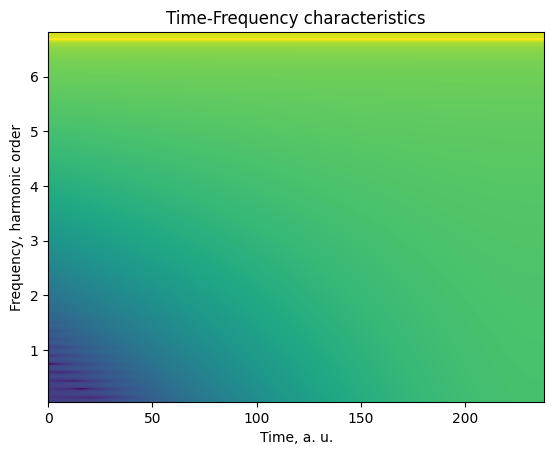

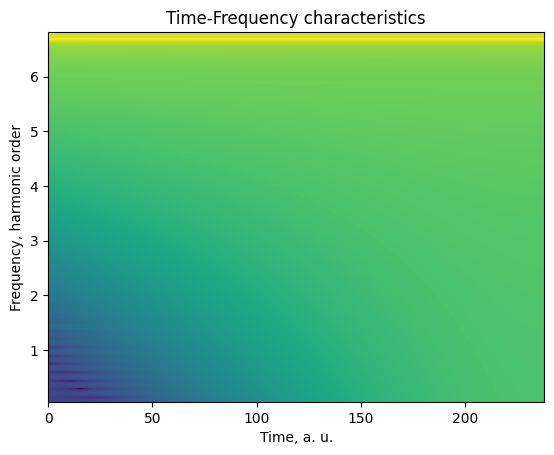

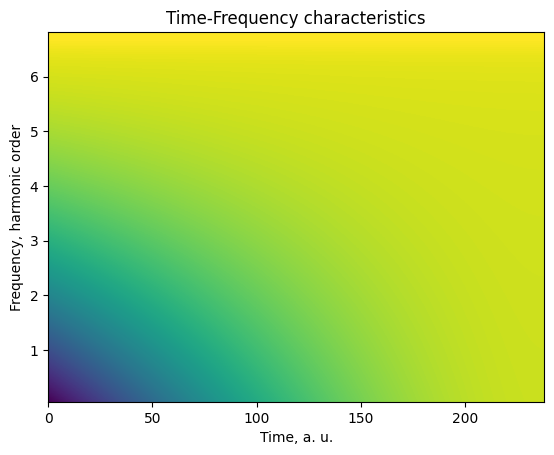

In [3]:
import matplotlib.pyplot as plt
from Res_visualisation import *

for file, A in numpy_arrays:
    print(f"{file}: {A.shape}")
    imshow_time_frequency_characteristics(A)
plt.show()


A_2024-12-15_22-03-02.npy: (238, 5000)
A_2024-12-15_22-23-55.npy: (238, 5000)
A_2024-12-15_23-05-38.npy: (238, 5000)


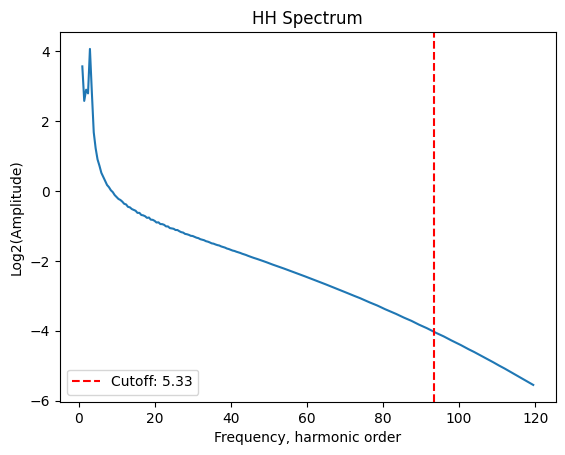

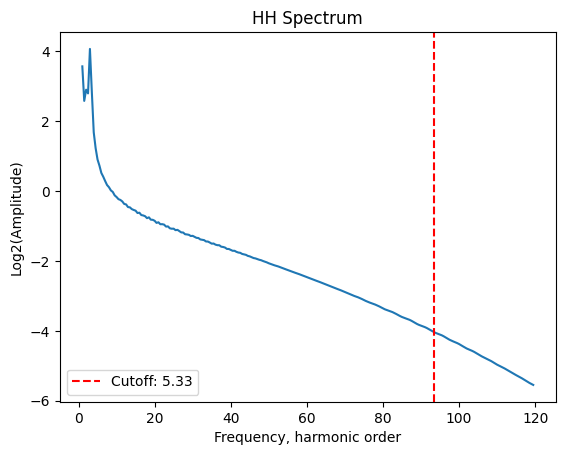

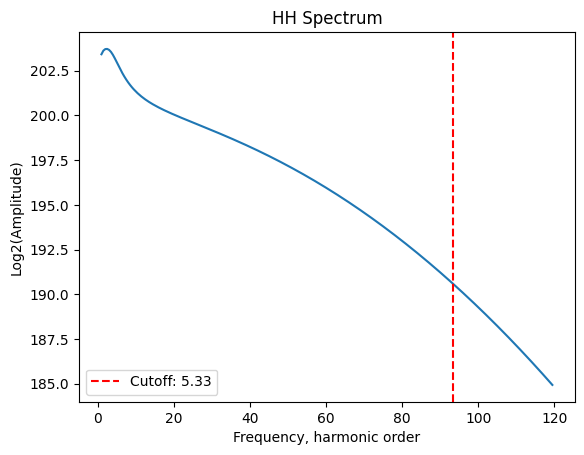

In [4]:
from Parameters import pars_YanPengPhysRevA_78_033821

params = pars_YanPengPhysRevA_78_033821()[1]
for file, A in numpy_arrays:
    print(f"{file}: {A.shape}")
    plot_HH_spectrum(A.shape[1]//2, A, params)
plt.show()
